# Data Analysis Project: Bike-Share Analysis

## Case Study: How does a Bike-Share navigate speedy success?

## Scenario
### In this project we study from a bike-share company to properly assess the current usage and to improve on the membership of the business. 

## Preparation

In [45]:
# Libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import glob
import datetime as dt
import time 


In [46]:
# Folder path where the data for the last 12 months is kept in this case the data is stored locally
path = r'C:\Users\andyw\Desktop\Computer Science\Bike_data\All_data'
all_files = glob.glob(os.path.join(path , "*.csv"))

df_all_files = (pd.read_csv(f) for f in all_files)
bike_data = pd.concat(df_all_files, ignore_index=True)

In [61]:
#Useful variables for the analysis
minute = 60
hour = 60 * minute
day = 24 * hour
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
hatches = []

In [48]:
#Calculate the 'ride_length' as a datetime object
bike_data['started_at'] = pd.to_datetime(bike_data['started_at'], format='%Y-%m-%d %H:%M:%S')
bike_data['ended_at'] = pd.to_datetime(bike_data['ended_at'], format='%Y-%m-%d %H:%M:%S')

In [49]:
#Convert the data into seconds for operations and then back to hours
bike_data['ride_length'] = (bike_data['ended_at'] - bike_data['started_at'])
bike_data['ride_length'] = (((bike_data.ride_length.dt.days * 24)*hour) + ((bike_data.ride_length.dt.seconds)))
bike_data['ride_length'] = bike_data['ride_length'] / hour

bike_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member,0.521944
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual,1.071667
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual,94.960833
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member,0.418333
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual,1.521389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5723527,E23BE3DB740BE3B4,docked_bike,2022-03-13 16:31:03,2022-03-13 16:39:32,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,casual,0.141389
5723528,15AF71F3220F2A75,docked_bike,2022-03-09 06:56:02,2022-03-09 07:42:14,Broadway & Barry Ave,13137,Ravenswood Ave & Berteau Ave,TA1309000018,41.937582,-87.644098,41.957921,-87.673567,casual,0.770000
5723529,9C4CE6CC19F8225B,electric_bike,2022-03-09 15:55:26,2022-03-09 16:08:54,NaN,NaN,Albany Ave & Montrose Ave,15621,41.940000,-87.710000,41.961041,-87.705866,member,0.224444
5723530,F4E136DEF696F3AE,electric_bike,2022-03-21 16:12:44,2022-03-21 16:18:24,NaN,NaN,Larrabee St & Division St,KA1504000079,41.910000,-87.650000,41.903486,-87.643353,member,0.094444


In [50]:
#formats a column with the day of the week where 0 is Monday and 6 is Sunday
bike_data['day_of_week'] = bike_data['started_at'].dt.day_name()
bike_data['month'] = bike_data['started_at'].dt.month_name()

## Analysis

### Guiding Questions:
#### - How should you organize your data to perform analysis on it?
#### - Has your data been properly formatted?
#### - What surprises did you discover in the data?
#### - How will these insights help answser your business questions?

### Key tasks:
#### 1. Aggregate your data so it's useful and accessible.
#### 2. Organize and format your data.
#### 3. Perform calculations.
#### 4. Idetify trends and relationships.

### Deliverables
#### Summary of Analysis

In [51]:
#This calculates the mean ride length
mean_rl = bike_data['ride_length'].mean()
print(mean_rl)
#This calculates the max ride length
max_rl = bike_data['ride_length'].max()
print(max_rl)
#This calculates the mode ride length
mode_rl = bike_data['ride_length'].mode()
print(mode_rl)

bike_data

0.35904036722621846
932.4025
0    0.097778
1    0.104722
dtype: float64


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,month
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member,0.521944,Monday,April
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual,1.071667,Tuesday,April
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual,94.960833,Saturday,April
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member,0.418333,Saturday,April
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual,1.521389,Saturday,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5723527,E23BE3DB740BE3B4,docked_bike,2022-03-13 16:31:03,2022-03-13 16:39:32,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,casual,0.141389,Sunday,March
5723528,15AF71F3220F2A75,docked_bike,2022-03-09 06:56:02,2022-03-09 07:42:14,Broadway & Barry Ave,13137,Ravenswood Ave & Berteau Ave,TA1309000018,41.937582,-87.644098,41.957921,-87.673567,casual,0.770000,Wednesday,March
5723529,9C4CE6CC19F8225B,electric_bike,2022-03-09 15:55:26,2022-03-09 16:08:54,NaN,NaN,Albany Ave & Montrose Ave,15621,41.940000,-87.710000,41.961041,-87.705866,member,0.224444,Wednesday,March
5723530,F4E136DEF696F3AE,electric_bike,2022-03-21 16:12:44,2022-03-21 16:18:24,NaN,NaN,Larrabee St & Division St,KA1504000079,41.910000,-87.650000,41.903486,-87.643353,member,0.094444,Monday,March


## Visualization of Data

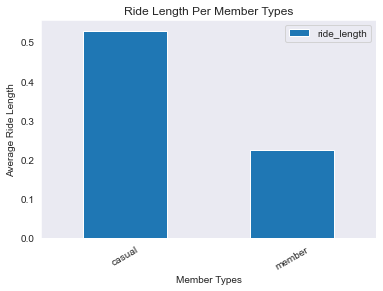

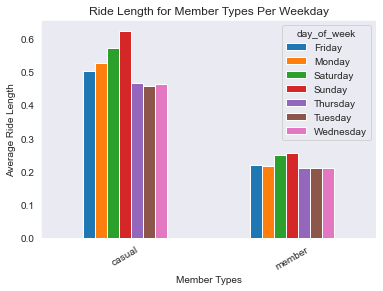

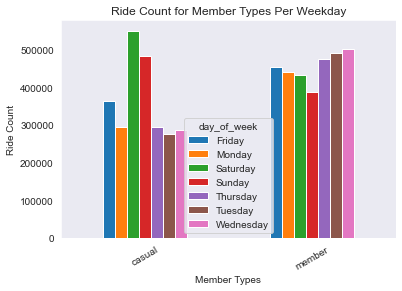

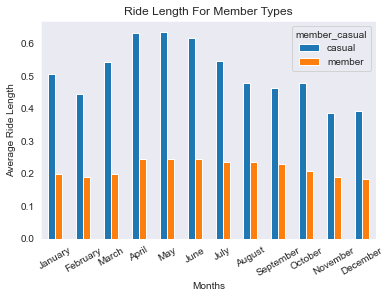

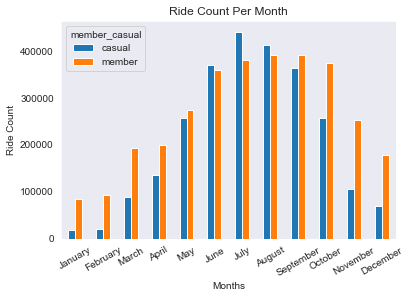

In [65]:
#Pivot table that focuses around the average ride length of members and casuals. 
table_1 = pd.pivot_table(bike_data, values='ride_length', index=['member_casual'], aggfunc=np.mean)
table_1

#Bar-plot between member type and ride length
#ax1 = table_1.plot(kind='bar', color=['#273c75'], hatch='///', title='Ride Length Per Member Types')
#plt.xlabel("Member Types")
#plt.ylabel("Average Ride Length")
#plt.savefig("ride_length+per_member.pdf", bbox_inches='tight')

sns.set_style("dark")
ax1 = table_1.plot(kind="bar")
plt.title('Ride Length Per Member Types')
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("Member Types")
plt.ylabel("Average Ride Length")
plt.savefig("ride_length_per_member.pdf", bbox_inches='tight')


#Pivot table that focuses around the average ride length per day of the week where 0=Monday and its split between members and casual. 
table_2 = pd.pivot_table(bike_data, values='ride_length', index=['member_casual'], columns=['day_of_week'], aggfunc=np.mean)
table_2

#Bar-plot between member type

ax2 = table_2.plot(kind='bar', title='Ride Length for Member Types Per Weekday', hatch='')
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("Member Types")
plt.ylabel("Average Ride Length")
plt.savefig("ride_length_for_member.pdf", bbox_inches='tight')
   
#Pivot table that focuses around the number of rides per member type per day of the week where 0=Monday
table_3 = pd.pivot_table(bike_data, values='ride_id', index=['member_casual'], columns=['day_of_week'], aggfunc='count')
table_3

#Bar-plot between member type and the number of rides
ax3 = table_3.plot(kind='bar', title='Ride Count for Member Types Per Weekday')
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("Member Types")
plt.ylabel("Ride Count")
plt.savefig("ride_count_for_member_week.pdf", bbox_inches='tight')

#Pivot table that focuses around the average ride length for member types per months
table_4 = pd.pivot_table(bike_data, values='ride_length', index=['month'], columns=['member_casual'], aggfunc=np.mean)
df_4 = table_4.sort_index(key=lambda x: pd.to_datetime(x, format="%B"))

#Bar-plot between member type and the number of rides
ax4 = df_4.plot(kind='bar', title='Ride Length For Member Types')
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("Months")
plt.ylabel("Average Ride Length")
plt.savefig("ride_length_for_member_month.pdf", bbox_inches='tight')



#Pivot table that focuses around the average ride count of ride type per month for casual and member riders
table_5 = pd.pivot_table(bike_data, values='ride_id', index=['month'], columns=['member_casual'], aggfunc='count')
df_5 = table_5.sort_index(key=lambda x: pd.to_datetime(x, format="%B"))

#Bar-plot table that focuses around monthly count of ride types per member types

ax5 = df_5.plot(kind='bar', title='Ride Count Per Month')
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("Months")
plt.ylabel("Ride Count")
plt.savefig("ride_count_per_month.pdf", bbox_inches='tight')

## Summary

### How do annual and casual riders use Cyclistic bikes differently?
Based on the data and the analysis we see a few key point differences between the types of riders.
First, we see that the average ride is longer for casual riders than member riders by a little over double the time.
Second, we see that Sundays have the longest average ride length for both casual and member types. While the shortest is on tuesdays. It's important to note that for both groups we see that average ride length to be higher from Friday to Monday and shortest from Tuesday to thursday. That being said the difference is much more pronounced for the casual rider type.
Third, in general the number of rides was higher for members throughout the week unlike casual types which only had a high number of rides during the weekends from friday to sunday.
Another thing to note is the fact that when looking at the data through the year it is apparent that the summer and fall are the strongest months for business for both casual and members. Out of the nine months in a year members do end up having more rides than casuals riders. However, the ride length is higher throughout the year for casual riders than member riders.

### Based on the data charts the suggestions for this case study are:
Increase the marketing strategy to suggest how more beneficial the yearly membership is to the casual riders since they spend the most time riding the bikes. That being said, while casual riders do longer rides, members and casual riders seem to do almost the same amount of rides per year. Interestingly enough the marketing team should focus their efforts around the summer and fall since those are the months where the highest number of casual riders are available. 
